# $I_{act}$ figure with using TARTES model from Libois et al. (2013, 2014)

## Install model

In [2]:
pip install tartes

Note: you may need to restart the kernel to use updated packages.


## Import librairies

In [7]:
import tartes
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import math
from tartes import albedo
from tartes import albedo, actinic_profile

## Initialisation with neede data to run the model

In [8]:
wls = 305e-9 # which wavelenght?

# note that 1 to 7 = experiment number (see informations.txt)

# SSA estimated using depth and Gallet et al. (2011)
SSA1 = 15 
SSA2 = 18
SSA3 = 32
SSA4 = 32
SSA5 = 45
SSA6 = 22
SSA7 = 22

SSA=(SSA1+SSA2+SSA3+SSA4+SSA5+SSA6+SSA7)/7 # mean SSA

# Density calculated by gravimetry
density1 = 396
density2 = 452
density3 = 396
density4 = 320
density5 = 452
density6 = 396
density7 = 377

density=(density1+density2+density3+density4+density5+density6+density7)/7 # mean density

z = np.arange(0, 0.5, 0.02) # x-axis scale

# simulation of the relative actinic flux for each snow sample
act_flux1 = tartes.actinic_profile(wls, z, SSA1, density1)
act_flux2 = tartes.actinic_profile(wls, z, SSA2, density2)
act_flux3 = tartes.actinic_profile(wls, z, SSA3, density3)
act_flux4 = tartes.actinic_profile(wls, z, SSA4, density4)
act_flux5 = tartes.actinic_profile(wls, z, SSA5, density5)
act_flux6 = tartes.actinic_profile(wls, z, SSA6, density6)
act_flux7 = tartes.actinic_profile(wls, z, SSA7, density7)

act_flux_mean = (act_flux1+act_flux2+act_flux3+act_flux4+act_flux5+act_flux6+act_flux7)/7 # mean actinic-flux

# downwelling and upwelling irradiande in average for all the snow sample
down_irr_profile, up_irr_profile = tartes.irradiance_profiles(wls, z, SSA, density)



## Figure

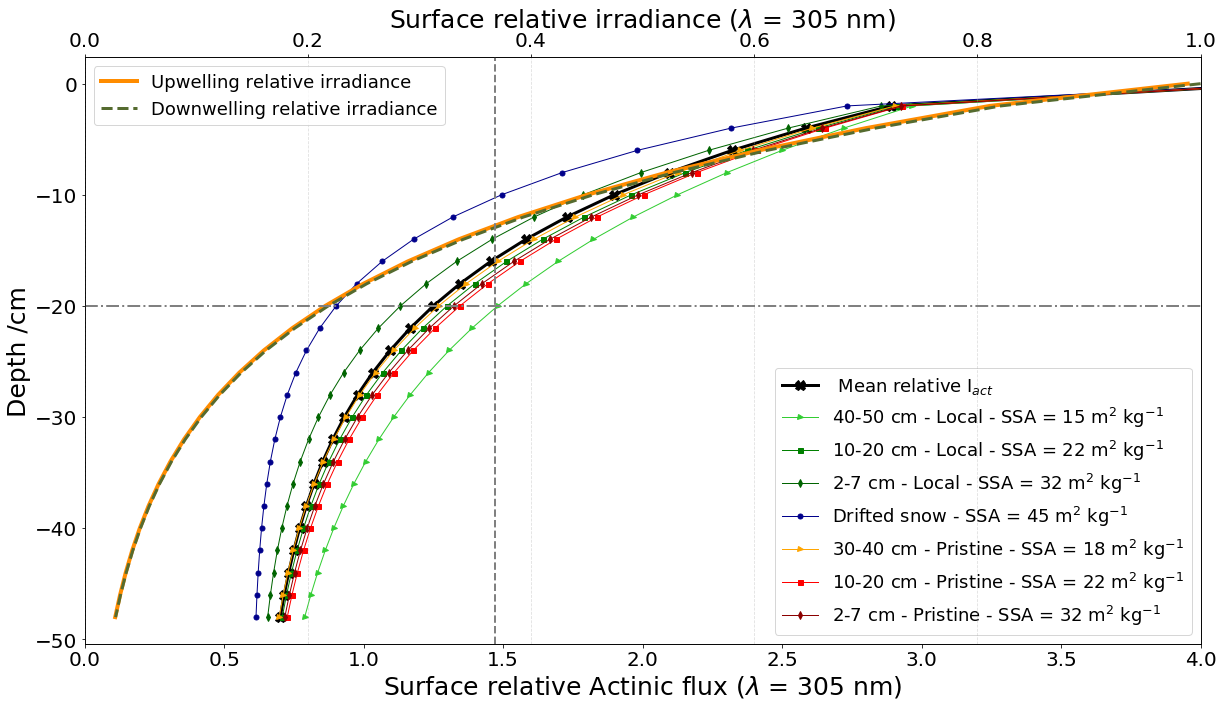

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel('Surface relative Actinic flux ($\lambda$ = 305 nm)', size=25)
ax.set_ylabel('Depth /cm', size=25)
ax.set_xlim(0,4)


ax.plot(((act_flux_mean*0.7)+(0.3*2)), -z*100, color='black', marker='X', markersize=10, linestyle='-', linewidth=3, label=r' Mean relative I$_{act}$')
ax.plot(((act_flux1*0.7)+(0.3*2)), -z*100, color='limegreen', marker='>',markersize=5,  linestyle='-', linewidth=1,  label='40-50 cm - Local - SSA = 15 m$^2$ kg$^{-1}$')
ax.plot(((act_flux6*0.7)+(0.3*2)), -z*100, color='green', marker='s', markersize=5, linestyle='-', linewidth=1,  label='10-20 cm - Local - SSA = 22 m$^2$ kg$^{-1}$')
ax.plot(((act_flux3*0.7)+(0.3*2)), -z*100, color='darkgreen', marker='d', markersize=5, linestyle='-', linewidth=1,  label='2-7 cm - Local - SSA = 32 m$^2$ kg$^{-1}$')
ax.plot(((act_flux5*0.7)+(0.3*2)), -z*100, color='darkblue', marker='o', markersize=5, linestyle='-', linewidth=1, label='Drifted snow - SSA = 45 m$^2$ kg$^{-1}$ ')
ax.plot(((act_flux2*0.7)+(0.3*2)), -z*100, color='orange', marker='>', markersize=5, linestyle='-', linewidth=1,  label='30-40 cm - Pristine - SSA = 18 m$^2$ kg$^{-1}$')
ax.plot(((act_flux7*0.7)+(0.3*2)), -z*100, color='red', marker='s', markersize=5, linestyle='-', linewidth=1,  label='10-20 cm - Pristine - SSA = 22 m$^2$ kg$^{-1}$')
ax.plot(((act_flux4*0.7)+(0.3*2)), -z*100, color='darkred', marker='d', markersize=5, linestyle='-', linewidth=1,  label='2-7 cm - Pristine - SSA = 32 m$^2$ kg$^{-1}$')


ax2 = ax.twiny() # create 2nd x-axis
ax2.set_xlabel('Surface relative irradiance ($\lambda$ = 305 nm)', size=25)
ax2.plot(up_irr_profile, -z*100, color='darkorange', linestyle='-', linewidth=4, label='Upwelling relative irradiance')
ax2.plot(down_irr_profile, -z*100, color='darkolivegreen', linestyle='--', linewidth=3, label='Downwelling relative irradiance')
ax2.set_xlim(0,1)
ax2.axhline(y=-0.2*100, color='gray', linestyle='-.', linewidth=2)
ax2.axvline(x=1/math.exp(1), color='grey', linestyle='--', linewidth=2)
#ax2.axvline(x=0.3125, color='grey', linestyle='--', linewidth=2)

plt.grid()

ax.legend(loc='lower right', ncol=1, fontsize=18)
ax2.legend(loc='upper left', ncol=1, fontsize=18)


plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.margins(x=0)
fig.align_ylabels()
fig.subplots_adjust(top=0.94)
plt.grid(axis='both', which='both', alpha=.4,linestyle='--')